In [1]:
#importing the necessary libraries
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_validate, KFold
import numpy as np
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, make_scorer, recall_score, f1_score, confusion_matrix, accuracy_score

In [2]:
#reading in the data, including all features extracted + Participant Number + Task_Label + Classification
#Task Labels refer to the conditions in the lab, and the classification is either 0 (no speech) or 1 (speech)
df = pd.read_excel('5fs_impedance_training_set.xlsx')
df

,Task_Label,ImP_insp_dur_mean,ImP_insp_dur_sd,ImP_exp_dur_mean,ImP_exp_dur_sd,ImP_insp_amp_mean,ImP_insp_amp_sd,ImP_exp_amp_mean,ImP_exp_amp_sd,ImP_insp_flow_mean,...,ImP_ie_ratio_sd,ImP_duty_cycle_mean,ImP_exp_diff_mean,ImP_RSP_Symmetry_PeakTrough,ImP_RRV_RMSSD,ImP_RSP_Rate_Mean,ImP_insp_minu_depth,ImP_exp_minu_depth,Participant,Classification
0,12.0a,1.640000,0.185712,1.694000,0.171499,0.323885,0.050985,0.317871,0.046774,0.196666,...,0.048638,0.489158,0.118857,0.517348,382.434308,17.917119,5.803093,5.695332,10785,0
1,12.0b,1.634222,0.085190,1.748000,0.173505,0.313992,0.030734,0.302703,0.031616,0.192669,...,0.069124,0.485452,0.225143,0.528718,390.361005,17.587836,5.522447,5.323893,10785,0
2,12.0c,2.147429,0.257242,2.272000,0.222699,0.360329,0.031615,0.357317,0.026435,0.169103,...,0.050025,0.476758,0.236000,0.520548,434.669530,14.228375,5.126892,5.084040,10785,0
3,12.0d,1.801714,0.101031,1.931429,0.190379,0.262865,0.029114,0.257946,0.025312,0.146060,...,0.071244,0.483507,0.250667,0.530733,403.425334,15.631763,4.109036,4.032155,10785,0
4,12.0e,2.022286,0.281822,2.132000,0.174310,0.302394,0.043005,0.300030,0.028574,0.149624,...,0.124387,0.481444,0.140800,0.527149,483.103302,14.459799,4.372557,4.338373,10785,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2569,85,1.432000,0.115903,1.499600,0.274684,0.050248,0.008020,0.049578,0.014866,0.034953,...,0.265283,0.489451,0.240000,0.524840,318.223192,20.447750,1.027459,1.013763,98586,0
2570,87,1.754857,0.761042,2.301714,0.764264,0.155933,0.121972,0.162249,0.102499,0.089435,...,0.375168,0.427189,0.708000,0.511842,1236.868088,14.849252,2.315484,2.409276,98586,1
2571,89,1.444000,0.082365,1.433600,0.122849,0.049310,0.006324,0.047141,0.012527,0.034207,...,0.082769,0.499069,0.119556,0.543171,159.285907,19.592504,0.966106,0.923614,98586,0
2572,91,1.653500,0.754087,1.872000,0.980966,0.088432,0.047870,0.097635,0.051081,0.053137,...,0.546540,0.482030,1.567500,0.472444,2899.130116,17.159436,1.517440,1.675358,98586,1


                        Feature  Mutual_Information
15            ImP_exp_diff_mean            0.293483
3                ImP_exp_dur_sd            0.282048
17                ImP_RRV_RMSSD            0.254266
9              ImP_insp_flow_sd            0.184132
13              ImP_ie_ratio_sd            0.180097
14          ImP_duty_cycle_mean            0.158181
5               ImP_insp_amp_sd            0.141856
16  ImP_RSP_Symmetry_PeakTrough            0.125429
7                ImP_exp_amp_sd            0.117354
2              ImP_exp_dur_mean            0.103910


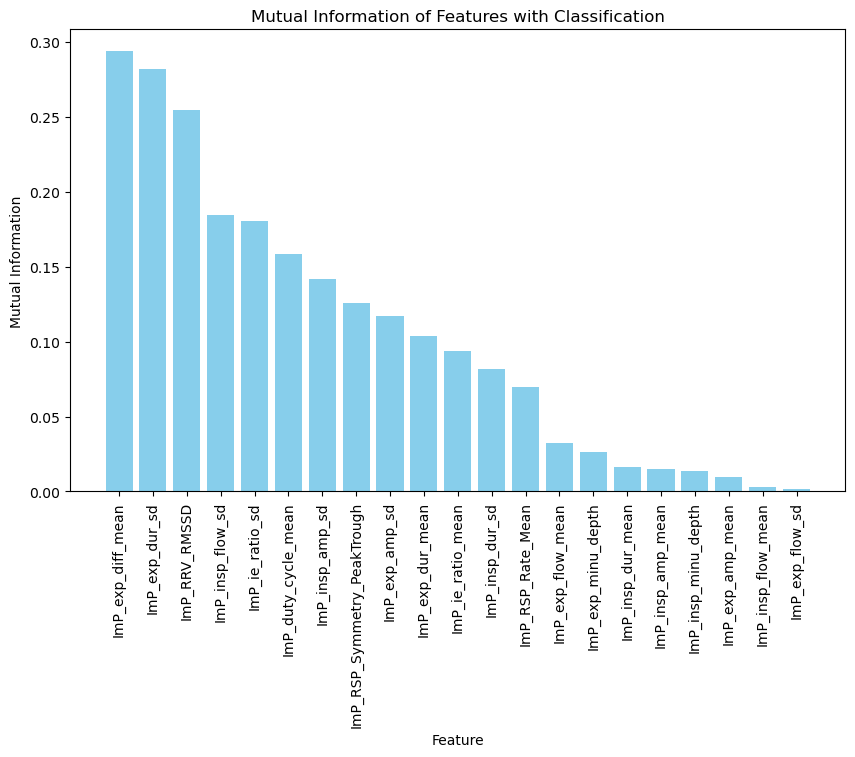

   ImP_exp_diff_mean  ImP_exp_dur_sd  ImP_RRV_RMSSD  ImP_insp_flow_sd  \
0           0.118857        0.171499     382.434308          0.015663   
1           0.225143        0.173505     390.361005          0.020811   
2           0.236000        0.222699     434.669530          0.016278   
3           0.250667        0.190379     403.425334          0.015714   
4           0.140800        0.174310     483.103302          0.006162   

   ImP_ie_ratio_sd  ImP_duty_cycle_mean  ImP_insp_amp_sd  \
0         0.048638             0.489158         0.050985   
1         0.069124             0.485452         0.030734   
2         0.050025             0.476758         0.031615   
3         0.071244             0.483507         0.029114   
4         0.124387             0.481444         0.043005   

   ImP_RSP_Symmetry_PeakTrough  ImP_exp_amp_sd  ImP_exp_dur_mean Task_Label  \
0                     0.517348        0.046774          1.694000      12.0a   
1                     0.528718        0.03

In [3]:
#identifying and plotting the 10 features that have the highest mutual information with the Classification
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

# dropping Participant and Classification columns
df_features = df.drop(columns=['Participant', 'Classification', 'Task_Label'])

A = df_features #defining the features to test
b = df['Classification'] #defining the target

# calculating mutual information
mutual_info = mutual_info_classif(A, b)

# making a dataframe to store feature names along with their mutual information statistic
feature_mi_df = pd.DataFrame({'Feature': A.columns, 'Mutual_Information': mutual_info})

# sort features by mutual information in descending order
feature_mi_df = feature_mi_df.sort_values(by='Mutual_Information', ascending=False)

# print the top 10 features
print(feature_mi_df.head(10))

# plot a histogram of the mutual information
plt.figure(figsize=(10, 6))
plt.bar(feature_mi_df['Feature'], feature_mi_df['Mutual_Information'], color='skyblue')
plt.xlabel('Feature')
plt.ylabel('Mutual Information')
plt.title('Mutual Information of Features with Classification')
plt.xticks(rotation=90)
plt.show()

# putting the top 10 features into a new variable
top_features = feature_mi_df['Feature'][:10].tolist()

# defining the columns to keep (we add the task_label, participant, classification as they will be used
#in the nested cross-validation)
columns_to_keep = top_features + ['Task_Label', 'Participant', 'Classification']

# filtering the dataframe to only keep the columns we want
df = df[columns_to_keep]

# Print the filtered DataFrame
print(df.head())


In [4]:
writer = pd.ExcelWriter('5fs_impedance_training_set_10_final.xlsx', engine = 'xlsxwriter')

df.to_excel(writer, index = False, float_format = '%.7f', sheet_name = 'Sheet1')

writer.save()

/var/folders/hp/bbc0951x6v16lx1z1dcbzqtm0000gn/T/ipykernel_67124/2925967420.py:5: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
